In [2]:
import numpy as np 
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

**Task 4: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?**

* how do we track time?  Hourly? Morning/afternoon/evening/night?


In [3]:
path = '/home/jewelle/data_bootcamp/'

In [222]:
flights_df =  pd.read_csv(path +'flights_sub.csv')

In [223]:
flights_df.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,0,2018-01-23,UA,UA_CODESHARE,UA,3405,YX,N653RW,3405,10821,...,169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018-11-15,AA,AA_CODESHARE,AA,5683,OH,N594NN,5683,11057,...,640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019-10-29,WN,WN,WN,2434,WN,N432WN,2434,12889,...,867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2019-11-14,B6,B6,B6,577,B6,N968JT,577,11697,...,2584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2019-05-22,DL,DL_CODESHARE,DL,3762,OO,N8933B,3762,10397,...,508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
flights_df.drop(columns=['Unnamed: 0', 'dup', 'mkt_unique_carrier'], axis=1, inplace=True)

In [225]:
flights_df.dtypes

fl_date                 object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code       object
diverted               float64
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance               float64
carrier_delay          float64
weather_

In [226]:
flights_df.isna().sum()

fl_date                    0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                  43
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                 170
dep_delay                174
taxi_out                 172
wheels_off               172
wheels_on                174
taxi_in                  174
crs_arr_time               0
arr_time                 174
arr_delay                206
cancelled                  0
cancellation_code       9828
diverted                   0
crs_elapsed_time           0
actual_elapsed_time      204
air_time                 204
flights                    0
distance                   0
carrier_delay           8140
weather_delay           8140
nas_delay               8140
security_delay

In [135]:
#taxi_in, taxi_out, arr_time, dep_time are target variables. Convert object columns to numeric?
#flights_df['arr_time'] = pd.to_numeric(flights_df['arr_time'], errors='coerce')
#flights_df['dep_time'] = pd.to_numeric(flights_df['dep_time'], errors='coerce')

In [233]:
#taxi in and taxi out 
taxi_out = flights_df.loc[(flights_df['taxi_out'].notna()) & (flights_df['dep_time'].notna())]
taxi_in = flights_df.loc[(flights_df['taxi_in'].notna()) & (flights_df['arr_time'].notna())]

In [234]:
taxi_out.head()

,fl_date,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2018-01-23,UA_CODESHARE,UA,3405,YX,N653RW,3405,10821,BWI,"Baltimore, MD",...,730,728.0,-2.0,0.0,0.0,75.0,89.0,49.0,1.0,169.0
1,2018-11-15,AA_CODESHARE,AA,5683,OH,N594NN,5683,11057,CLT,"Charlotte, NC",...,1029,1015.0,-14.0,0.0,0.0,136.0,122.0,99.0,1.0,640.0
2,2019-10-29,WN,WN,2434,WN,N432WN,2434,12889,LAS,"Las Vegas, NV",...,2330,2339.0,9.0,0.0,0.0,155.0,156.0,139.0,1.0,867.0
3,2019-11-14,B6,B6,577,B6,N968JT,577,11697,FLL,"Fort Lauderdale, FL",...,1158,1135.0,-23.0,0.0,0.0,385.0,371.0,346.0,1.0,2584.0
4,2019-05-22,DL_CODESHARE,DL,3762,OO,N8933B,3762,10397,ATL,"Atlanta, GA",...,1532,1531.0,-1.0,0.0,0.0,107.0,90.0,73.0,1.0,508.0


In [229]:
#check missing values
total = taxi_out.isnull().sum().sort_values(ascending=False)
percent = (taxi_out.isnull().sum()/taxi_out.isnull().count()).sort_values(ascending=False)
missing_data_out = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_out.head(20)

,Total,Percent
no_name,9828,1.000000
cancellation_code,9828,1.000000
total_add_gtime,9758,0.992877
first_dep_time,9758,0.992877
longest_add_gtime,9758,0.992877
late_aircraft_delay,7968,0.810745
security_delay,7968,0.810745
nas_delay,7968,0.810745
weather_delay,7968,0.810745
carrier_delay,7968,0.810745


In [230]:
#drop irrelevant columns with mostly missing data
drop_columns = missing_data_out[missing_data_out['Percent'] > 0.8].index.tolist()
flights_df.drop(drop_columns, axis=1, inplace=True)

In [235]:
taxi_in.head()

,fl_date,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2018-01-23,UA_CODESHARE,UA,3405,YX,N653RW,3405,10821,BWI,"Baltimore, MD",...,730,728.0,-2.0,0.0,0.0,75.0,89.0,49.0,1.0,169.0
1,2018-11-15,AA_CODESHARE,AA,5683,OH,N594NN,5683,11057,CLT,"Charlotte, NC",...,1029,1015.0,-14.0,0.0,0.0,136.0,122.0,99.0,1.0,640.0
2,2019-10-29,WN,WN,2434,WN,N432WN,2434,12889,LAS,"Las Vegas, NV",...,2330,2339.0,9.0,0.0,0.0,155.0,156.0,139.0,1.0,867.0
3,2019-11-14,B6,B6,577,B6,N968JT,577,11697,FLL,"Fort Lauderdale, FL",...,1158,1135.0,-23.0,0.0,0.0,385.0,371.0,346.0,1.0,2584.0
4,2019-05-22,DL_CODESHARE,DL,3762,OO,N8933B,3762,10397,ATL,"Atlanta, GA",...,1532,1531.0,-1.0,0.0,0.0,107.0,90.0,73.0,1.0,508.0


In [232]:
total = taxi_in.isnull().sum().sort_values(ascending=False)
percent = (taxi_in.isnull().sum()/taxi_in.isnull().count()).sort_values(ascending=False)
missing_data_in = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_in.head()

,Total,Percent
no_name,9826,1.000000
cancellation_code,9826,1.000000
total_add_gtime,9756,0.992876
first_dep_time,9756,0.992876
longest_add_gtime,9756,0.992876


In [236]:
#Convert to values to datetime format using function from data prep
def convert_time(x):
    if np.isnan(x):
        return '00:00'
    
    if x == 2400:
        return '23:59'   
    string = str(int(x))
    
    if len(string)< 4:
        for _ in range(4-len(string)):
            string = '0' + string
    
    return string[:2] + ':' + string[2:]

In [237]:
taxi_out['dep_time'] = taxi_out['dep_time'].apply(lambda x: convert_time(x))
taxi_out['dep_time'] = pd.to_datetime(taxi_out['dep_time'], format ='%H:%M')
taxi_out['dep_hour'] = taxi_out['dep_time'].dt.hour

/home/jewelle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jewelle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jewelle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [239]:
taxi_out_hour_mean = taxi_out.groupby('dep_hour')['taxi_out'].mean()
taxi_out_hour_med = taxi_out.groupby('dep_hour')['taxi_out'].median()

In [240]:
#add time of day
taxi_out.loc[taxi_out["dep_hour"].between(6,11), "dep_time_of_day"] = "morning"
taxi_out.loc[taxi_out["dep_hour"].between(12,17), "dep_time_of_day"] = "afternoon"
taxi_out.loc[taxi_out["dep_hour"].between(18,21), "dep_time_of_day"] = "evening"
taxi_out.loc[taxi_out["dep_hour"].between(22,5), "dep_time_of_day"] = "night"

/home/jewelle/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jewelle/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [241]:
taxi_out.head()

,fl_date,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,dep_hour,dep_time_of_day
0,2018-01-23,UA_CODESHARE,UA,3405,YX,N653RW,3405,10821,BWI,"Baltimore, MD",...,-2.0,0.0,0.0,75.0,89.0,49.0,1.0,169.0,5,NaN
1,2018-11-15,AA_CODESHARE,AA,5683,OH,N594NN,5683,11057,CLT,"Charlotte, NC",...,-14.0,0.0,0.0,136.0,122.0,99.0,1.0,640.0,9,morning
2,2019-10-29,WN,WN,2434,WN,N432WN,2434,12889,LAS,"Las Vegas, NV",...,9.0,0.0,0.0,155.0,156.0,139.0,1.0,867.0,21,evening
3,2019-11-14,B6,B6,577,B6,N968JT,577,11697,FLL,"Fort Lauderdale, FL",...,-23.0,0.0,0.0,385.0,371.0,346.0,1.0,2584.0,8,morning
4,2019-05-22,DL_CODESHARE,DL,3762,OO,N8933B,3762,10397,ATL,"Atlanta, GA",...,-1.0,0.0,0.0,107.0,90.0,73.0,1.0,508.0,14,afternoon


In [252]:
#group departing flights by hour and time of day
flights_by_hour = taxi_out.loc[taxi_out['cancelled'] != 1].groupby('dep_hour')['fl_date'].count()
dep_flights_by_time = taxi_out.loc[taxi_out['cancelled'] != 1].groupby('dep_time_of_day')['fl_date'].count()

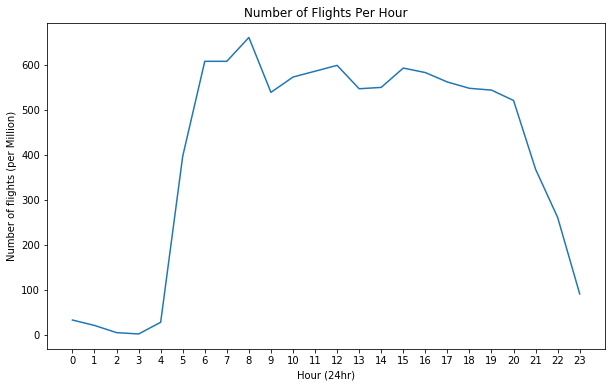

In [243]:
#plot departing flights by hour
plt.figure(figsize=(10,6))

plt.plot(flights_by_hour.index, flights_by_hour.values)
plt.xticks(flights_by_hour.index)
plt.title('Number of Flights Per Hour')
plt.xlabel('Hour (24hr)')
plt.ylabel('Number of flights (per Million)');

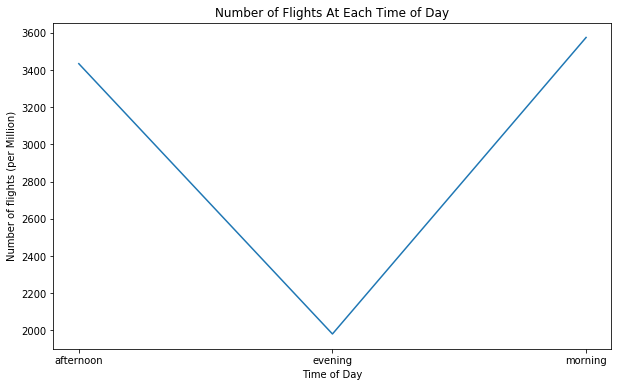

In [253]:
#plot departing flights by time of day
plt.figure(figsize=(10,6))

plt.plot(dep_flights_by_time.index, dep_flights_by_time.values)
plt.xticks(dep_flights_by_time.index)
plt.title('Number of Flights At Each Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of flights (per Million)');

In [238]:
taxi_in['arr_time'] = taxi_in['arr_time'].apply(lambda x: convert_time(x))
taxi_in['arr_time'] = pd.to_datetime(taxi_in['arr_time'], format ='%H:%M')
taxi_in['arr_hour'] = taxi_in['arr_time'].dt.hour

/home/jewelle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jewelle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jewelle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [245]:
taxi_in_hour_mean = taxi_in.groupby('arr_hour')['taxi_in'].mean()
taxi_in_hour_med = taxi_in.groupby('arr_hour')['taxi_in'].median()

In [246]:
#add time of day
taxi_in.loc[taxi_in["arr_hour"].between(6,11), "arr_time_of_day"] = "morning"
taxi_in.loc[taxi_in["arr_hour"].between(12,17), "arr_time_of_day"] = "afternoon"
taxi_in.loc[taxi_in["arr_hour"].between(18,21), "arr_time_of_day"] = "evening"
taxi_in.loc[taxi_in["arr_hour"].between(22,5), "arr_time_of_day"] = "night"

/home/jewelle/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jewelle/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


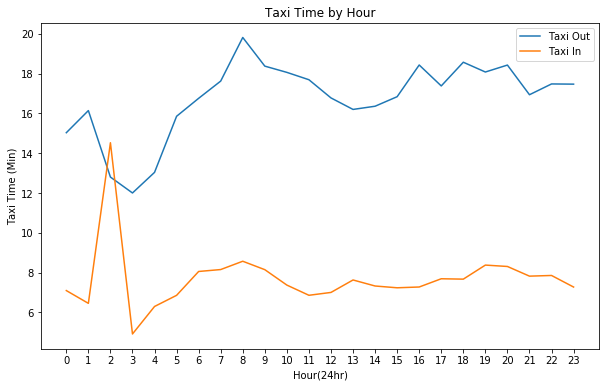

In [251]:
#Taxi in and out times throughout the day
plt.figure(figsize=(10,6))

plt.plot(taxi_out_hour_mean.index, taxi_out_hour_mean.values, label='Taxi Out')
plt.plot(taxi_in_hour_mean.index, taxi_in_hour_mean.values, label='Taxi In')

plt.xticks(taxi_out_hour_mean.index);
plt.title('Taxi Time by Hour')
plt.xlabel('Hour(24hr)')
plt.ylabel('Taxi Time (Min)')

plt.xticks(taxi_out_hour_mean.index);
plt.title('Taxi Time by Hour')
plt.xlabel('Hour(24hr)')
plt.ylabel('Taxi Time (Min)')
​
plt.legend()
plt.show()
#comparing to the graph above, there seems to be a positive correlation between taxi time and flight volume

​

plt.legend()
plt.show()
#comparing to the graph above, there seems to be a positive correlation between taxi time and flight volume